In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv('/content/loan_approval_dataset.csv')


In [84]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [85]:
df.drop(columns=['loan_id'],inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [86]:
df.shape

(4269, 12)

In [87]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [90]:
print(df.columns)


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [91]:
df.columns = df.columns.str.strip()


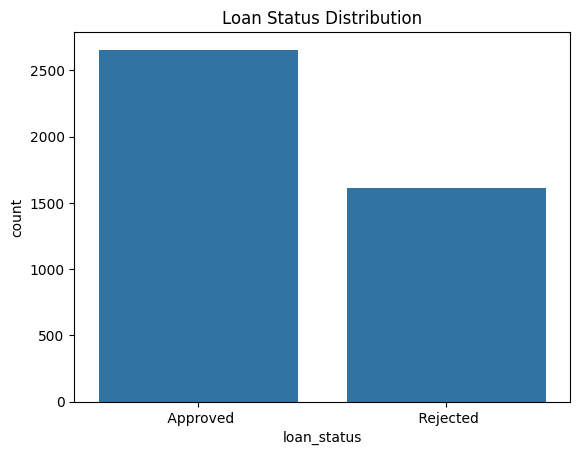

In [92]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

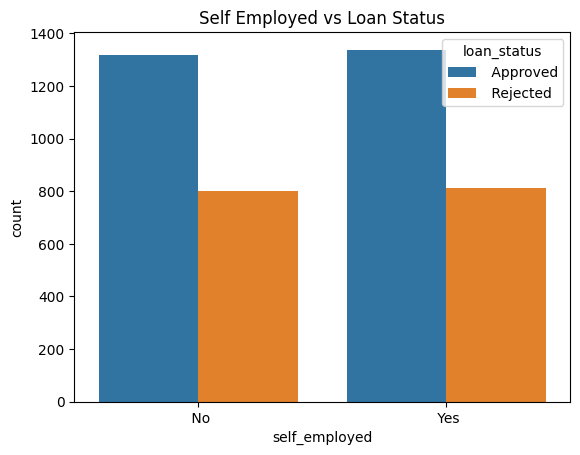

In [93]:
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title("Self Employed vs Loan Status")
plt.show()

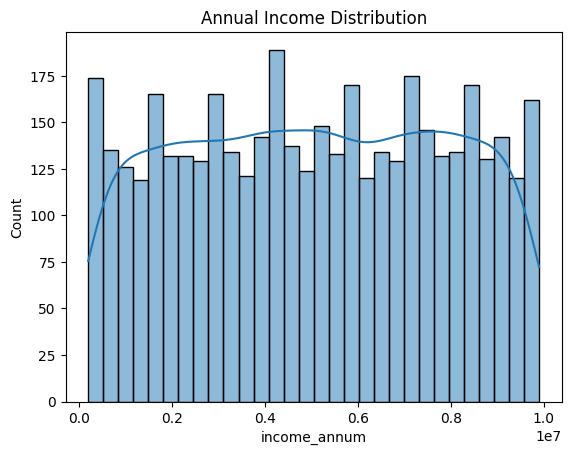

In [94]:
sns.histplot(df['income_annum'], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()

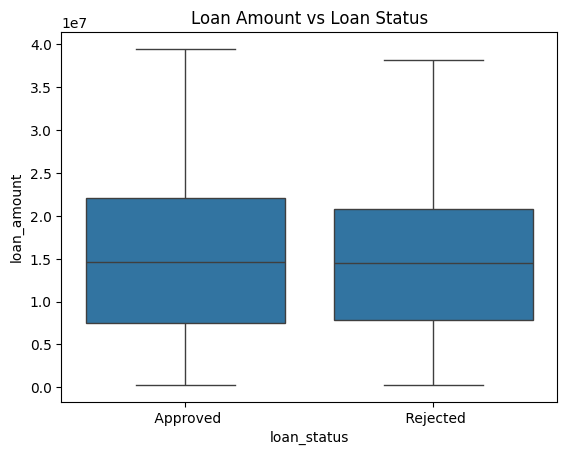

In [95]:
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

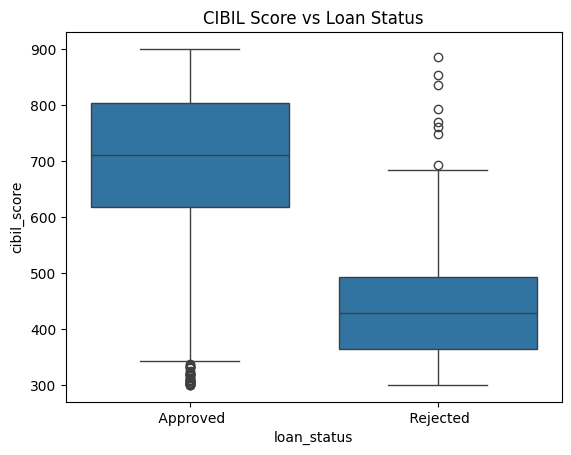

In [96]:
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title("CIBIL Score vs Loan Status")
plt.show()

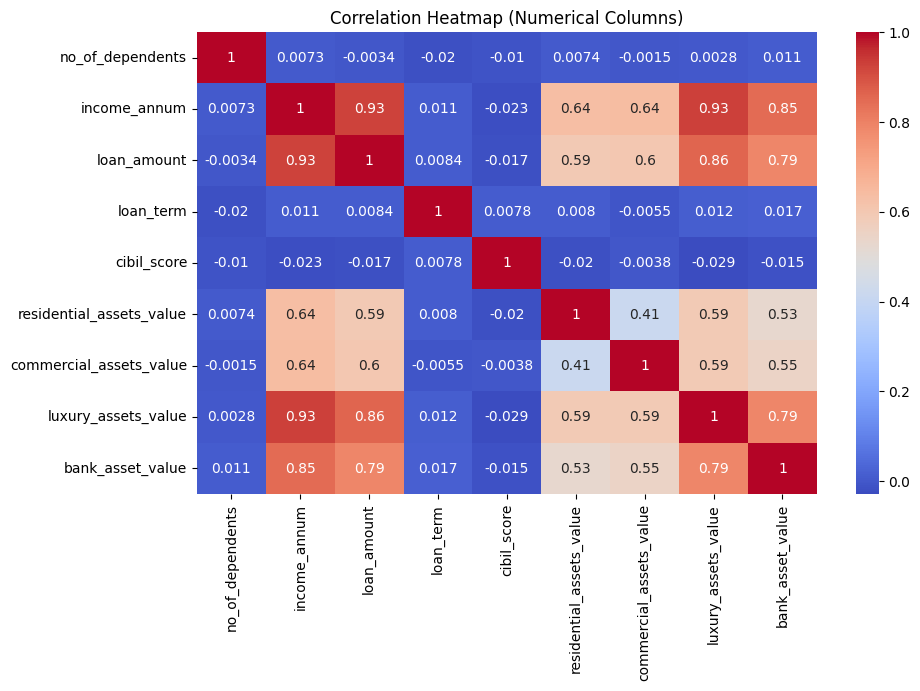

In [97]:

numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']

# Compute correlation
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

In [98]:
numeric_features = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]


In [99]:
categorical_features = ['education', 'self_employed']

In [100]:
target = 'loan_status'

In [101]:
for col in categorical_features + [target]:
    print(f"{col}: {df[col].dtype}, unique values: {df[col].unique()}")

education: object, unique values: [' Graduate' ' Not Graduate']
self_employed: object, unique values: [' No' ' Yes']
loan_status: object, unique values: [' Approved' ' Rejected']


In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[target] = le.fit_transform(df[target].astype(str))  # Approved=1, Rejected=0


In [103]:
for col in categorical_features:
    if df[col].nunique() > 1:
        df[col] = df[col].astype(str)  # ensure string
        df[col] = le.fit_transform(df[col])
    else:
        print(f"{col} has only one unique value, dropping column.")
        df.drop(col, axis=1, inplace=True)


In [104]:
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-2060145787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [106]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1


In [107]:
X = df.drop(columns=[target])  # all features except target
y = df[target]
print(X.head())
print(y.head())


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_asset_value  
0             0.832

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [116]:
# Initialize Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# ---------------------------
# Train, Predict, Evaluate
results = {}  # store accuracy for comparison

for name, model in models.items():
    # Train
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print(f"Accuracy: {round(acc*100,2)}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# ---------------------------
# Optional: Compare Accuracy
print("\n--- Accuracy Comparison ---")
for model, acc in results.items():
    print(f"{model}: {round(acc*100,2)}%")


=== Logistic Regression ===
Accuracy: 90.52%
Confusion Matrix:
[[498  38]
 [ 43 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854


=== Decision Tree ===
Accuracy: 97.78%
Confusion Matrix:
[[527   9]
 [ 10 308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


=== Random Forest ===
Accuracy: 97.89%
Confusion Matrix:
[[529   7]
 [ 11 307]]

Classification Report:
              precision  

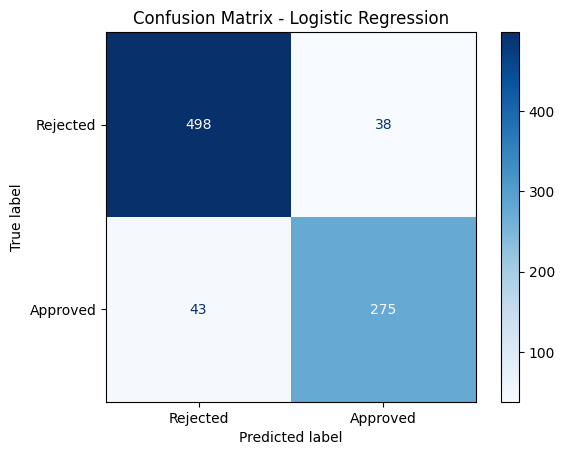

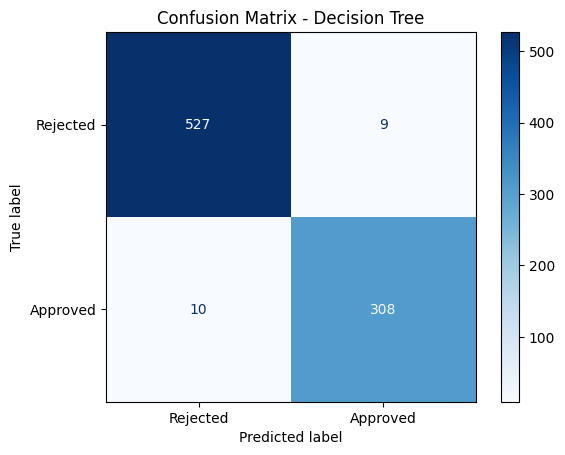

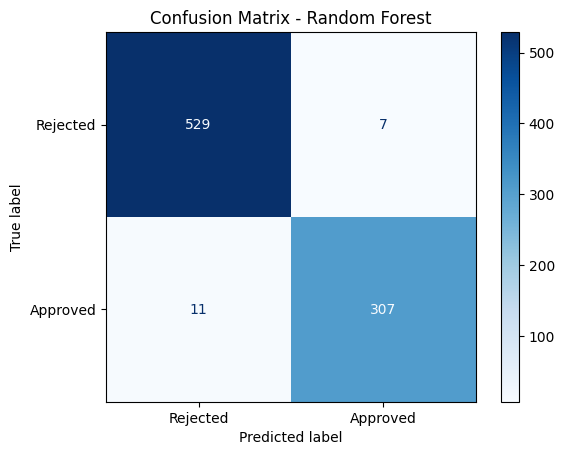

In [119]:
# ===============================
# Confusion Matrix Plots for All Models
# ===============================
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(x_test)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                                  display_labels=['Rejected', 'Approved'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [122]:
import pickle

# Save Random Forest model
with open("loan_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save Scaler
with open("loan_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully with Pickle!")


Model and Scaler saved successfully with Pickle!
